In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
import idx2numpy as idx
%matplotlib inline

In [2]:
train_images = idx.convert_from_file("./data/train-images-ubyte")
train_labels = idx.convert_from_file("./data/train-labels-ubyte")
test_images = idx.convert_from_file("./data/test-images-ubyte")
test_labels = idx.convert_from_file("./data/test-labels-ubyte")
row_size, col_size = 28, 28

In [3]:
num_dev = 10000
perm = torch.randperm(len(train_images))
train_idx = perm[num_dev:]
dev_idx = perm[:num_dev]

In [4]:
def build_xy(image, label):
    return torch.tensor(image).float() / 255.0, torch.tensor(label).long()

def data_nll(X, Y, model):
    with torch.no_grad():
        logits = model(X)
        loss = F.cross_entropy(logits, Y)
        return loss.item()


In [5]:
X, Y = build_xy(train_images, train_labels)
Xtr, Ytr = X[train_idx], Y[train_idx]
Xdev, Ydev = X[dev_idx], Y[dev_idx]
Xte, Yte = build_xy(test_images, test_labels)
g = torch.Generator().manual_seed(2147483647)

In [6]:
n_hidden = 64

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(row_size * col_size, n_hidden), nn.BatchNorm1d(n_hidden), nn.ReLU(),
    nn.Linear(n_hidden, n_hidden), nn.BatchNorm1d(n_hidden), nn.ReLU(),
    nn.Linear(n_hidden, n_hidden), nn.BatchNorm1d(n_hidden), nn.ReLU(),
    nn.Linear(n_hidden, 10)
)

with torch.no_grad():
    model[-1].weight *= 0.1

print(sum(p.numel() for p in model.parameters()))

for p in model.parameters():
    p.requires_grad = True

59594


In [7]:
lossi = []

In [9]:
steps = 200000
batch_size = 32

for i in range(steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))
    Xb, Yb = Xtr[ix], Ytr[ix]

    loss = F.cross_entropy(model(Xb), Yb)

    for p in model.parameters():
        p.grad = None
    loss.backward()

    lr = 0.1 if i < 100000 else 0.01
    for p in model.parameters():
        p.data -= lr * p.grad

    lossi.append(loss.item())
    if i % 1000 == 0:
        print(i, loss.item())

0 2.3029568195343018
1000 0.040855783969163895
2000 0.1299700289964676
3000 0.04288060963153839
4000 0.0829106941819191
5000 0.19856972992420197
6000 0.06766841560602188
7000 0.12092631310224533
8000 0.007545930333435535
9000 0.16834591329097748
10000 0.010740065015852451
11000 0.04934541881084442
12000 0.07412164658308029
13000 0.08925957977771759
14000 0.015366658568382263
15000 0.058359310030937195
16000 0.05946063995361328
17000 0.013901466503739357
18000 0.012750829569995403
19000 0.036256883293390274
20000 0.002698862925171852
21000 0.013341748155653477
22000 0.007026027888059616
23000 0.017176112160086632
24000 0.03849086910486221
25000 0.009129604324698448
26000 0.005157172679901123
27000 0.0030910815112292767
28000 0.0036020088009536266
29000 0.010516359470784664
30000 0.035907503217458725
31000 0.0024573788978159428
32000 0.019648706540465355
33000 0.0005897543742321432
34000 0.05578285828232765
35000 0.018964732065796852
36000 0.005743951536715031
37000 0.006671303417533636


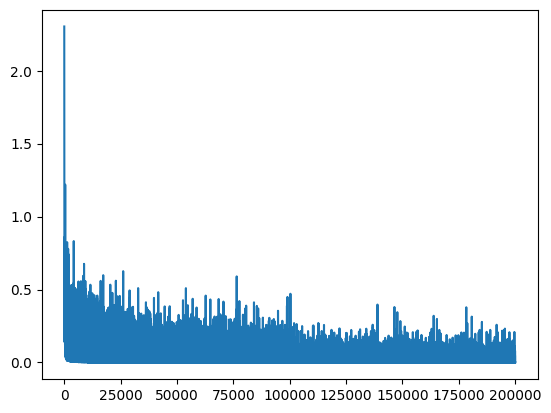

In [10]:
plt.plot(torch.tensor(lossi).view(-1, 1).mean(1))

In [11]:
for layer in model:
    if isinstance(layer, nn.BatchNorm1d):
        layer.training = False

print(data_nll(Xtr, Ytr, model))
print(data_nll(Xdev, Ydev, model))
Xtr.size(0)

0.00016033467545639724
0.0844351202249527


50000

In [12]:
def predict(model, X, Y, wrong):
    model.eval()
    with torch.no_grad():
        logits = model(X)
        pred = logits.argmax(dim=1)
        for i in range(X.size(0)):
            if pred[i].item() != Y[i].item():
                wrong.append(i)

In [13]:
wrong = []
predict(model, Xte, Yte, wrong)

In [15]:
def predict_wrong(model, X, Y, wrong):
    model.eval()
    with torch.no_grad():
        logits = model(X)
        pred = logits.argmax(dim=1)
        for i in wrong:
            print(f'prediction = {pred[i].item()}')
            plt.imshow(X[i].view(row_size, col_size), cmap='gray')
            plt.axis('off')
            plt.show()

prediction = 9


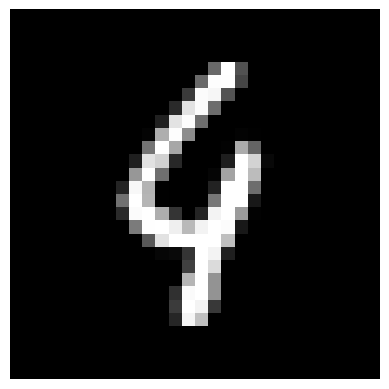

prediction = 8


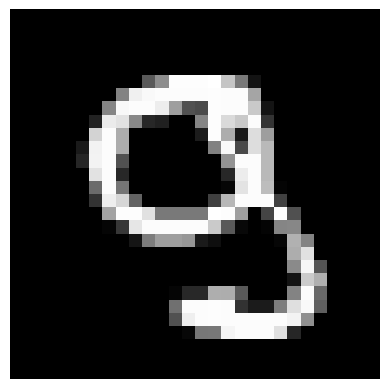

prediction = 9


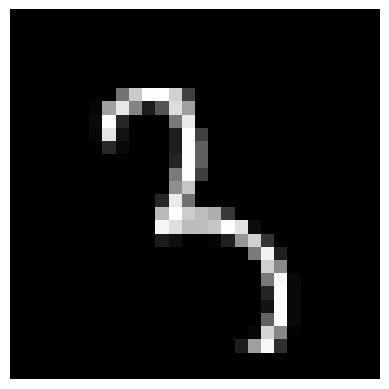

prediction = 6


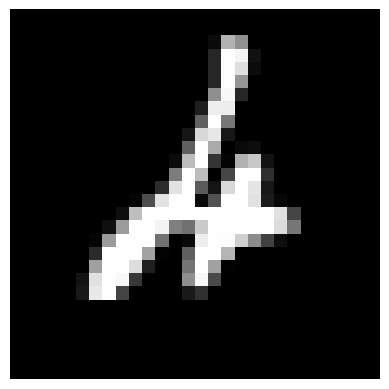

prediction = 7


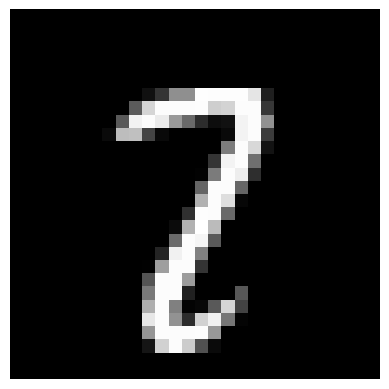

prediction = 9


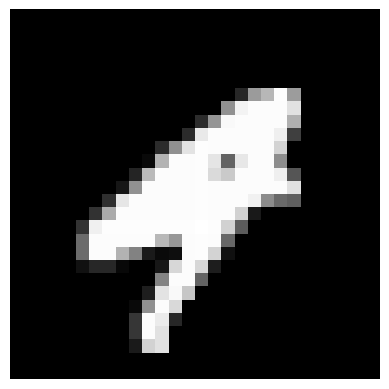

prediction = 5


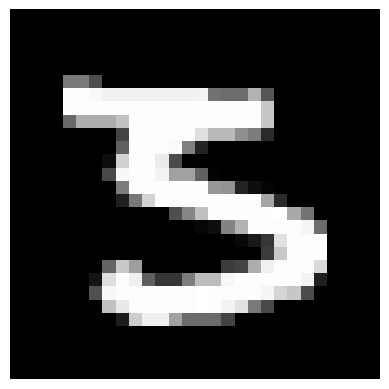

prediction = 2


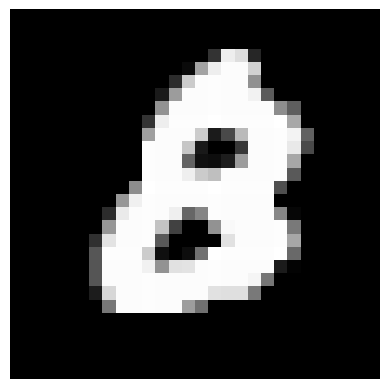

prediction = 2


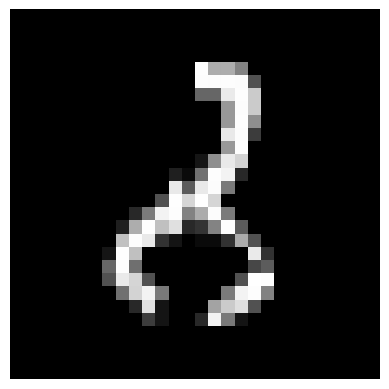

prediction = 1


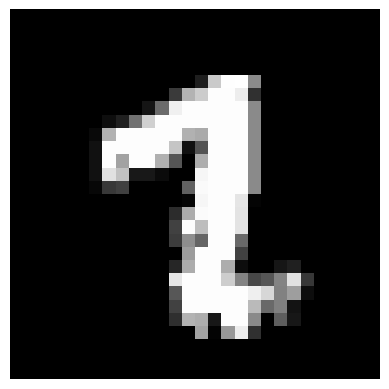

prediction = 3


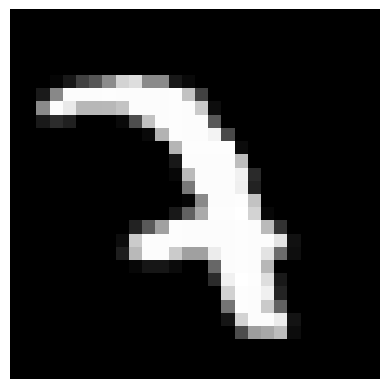

prediction = 8


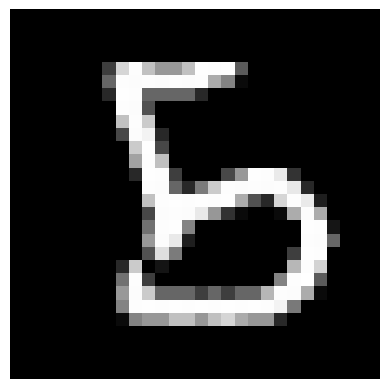

prediction = 7


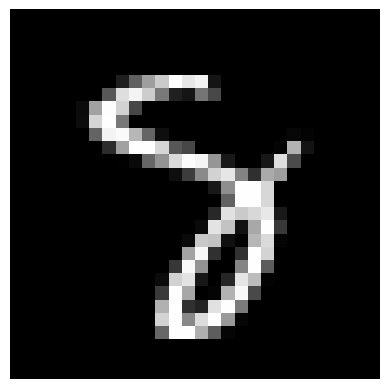

prediction = 7


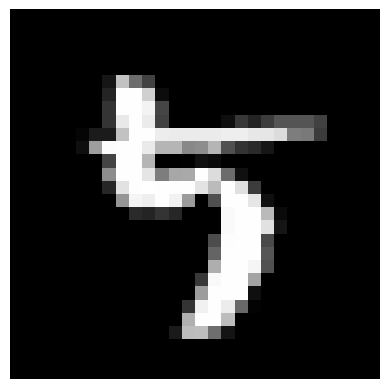

prediction = 5


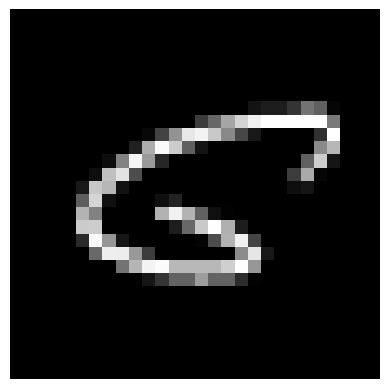

prediction = 2


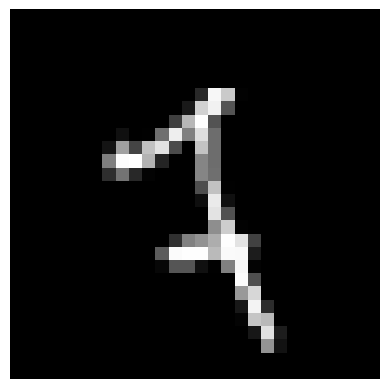

prediction = 8


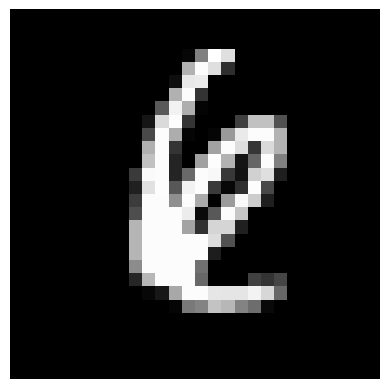

prediction = 6


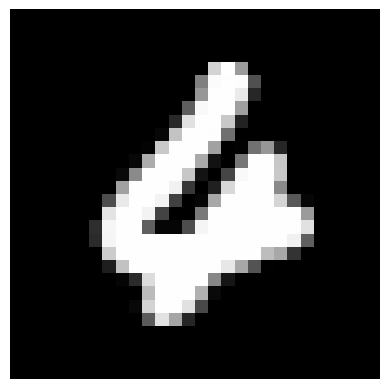

prediction = 5


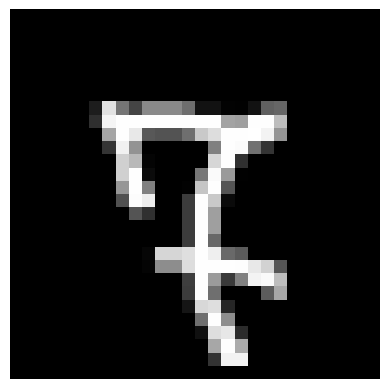

prediction = 1


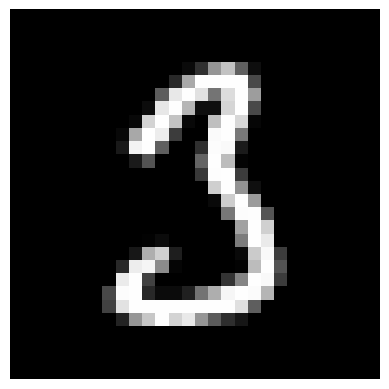

prediction = 4


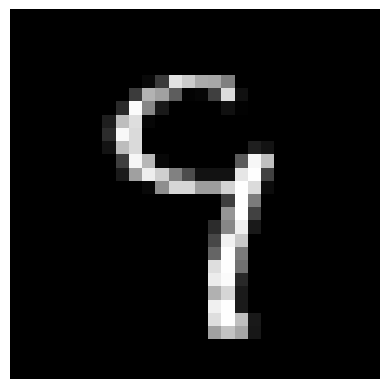

prediction = 2


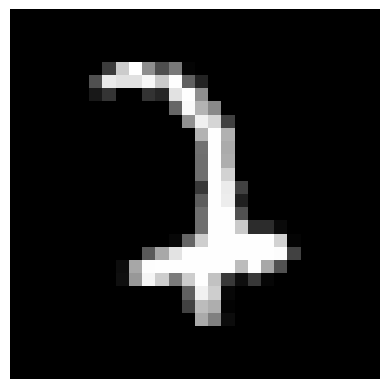

prediction = 4


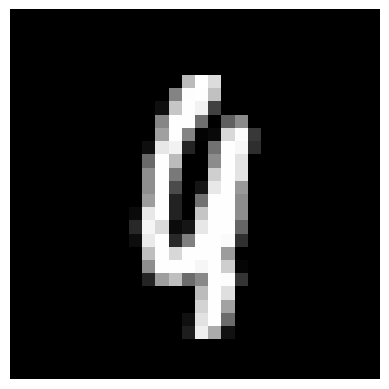

prediction = 9


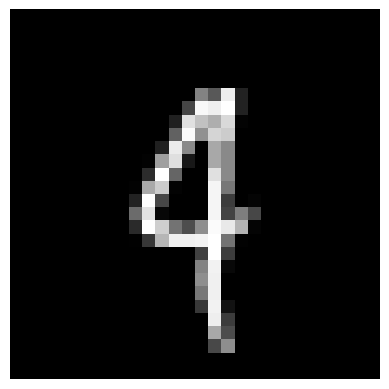

prediction = 3


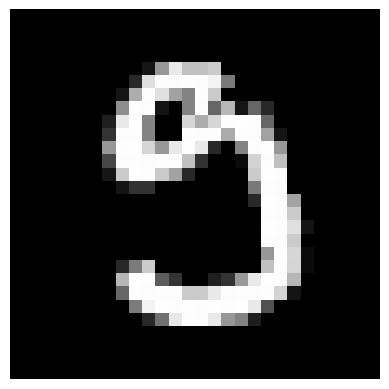

prediction = 7


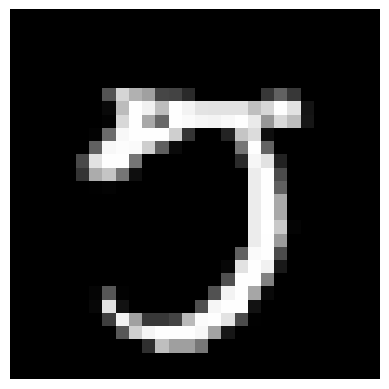

prediction = 3


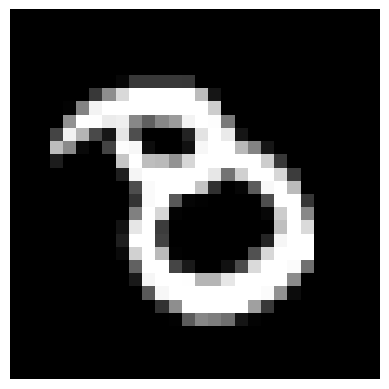

prediction = 5


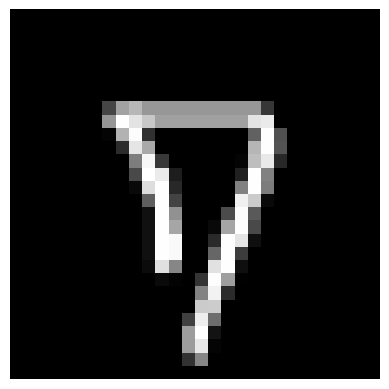

prediction = 3


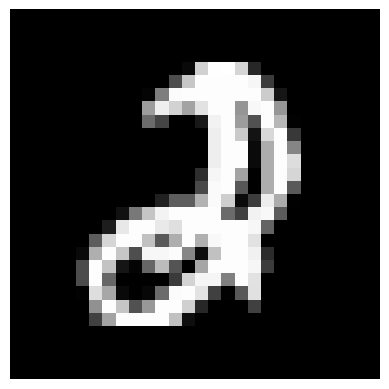

prediction = 5


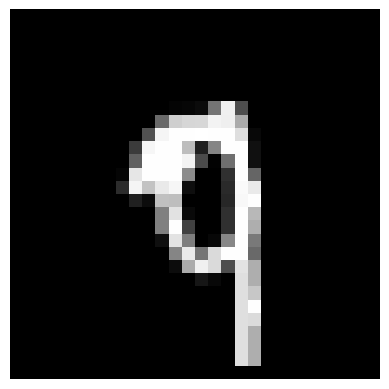

prediction = 1


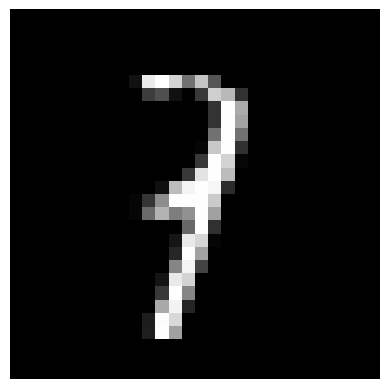

prediction = 9


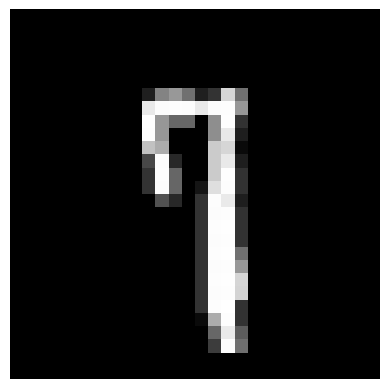

prediction = 7


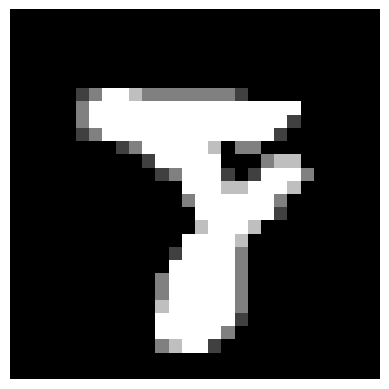

prediction = 6


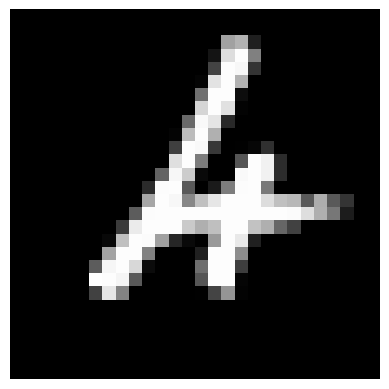

prediction = 3


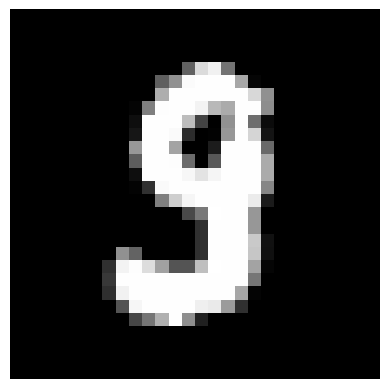

prediction = 3


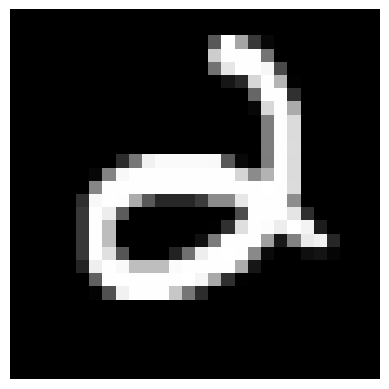

prediction = 7


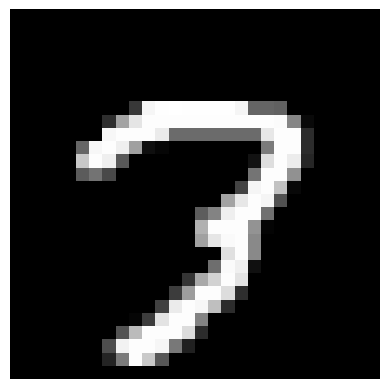

prediction = 4


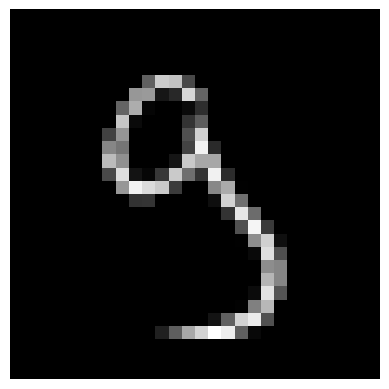

prediction = 0


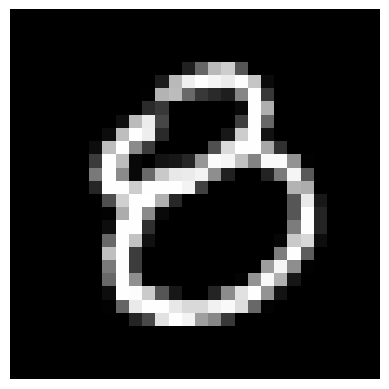

prediction = 6


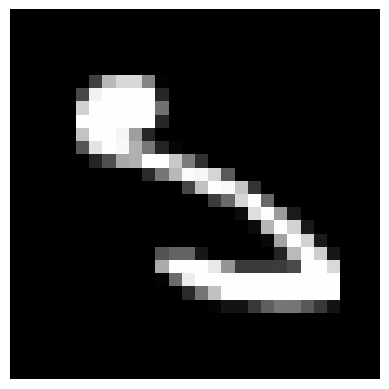

prediction = 3


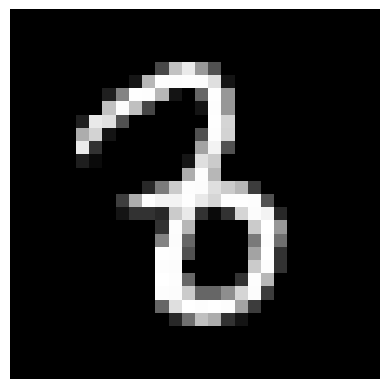

prediction = 4


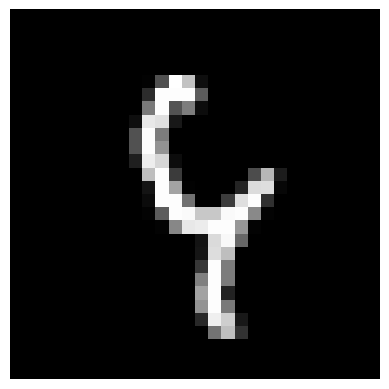

prediction = 0


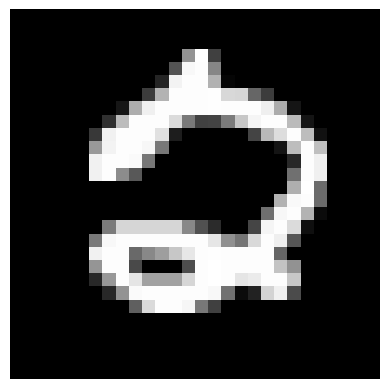

prediction = 9


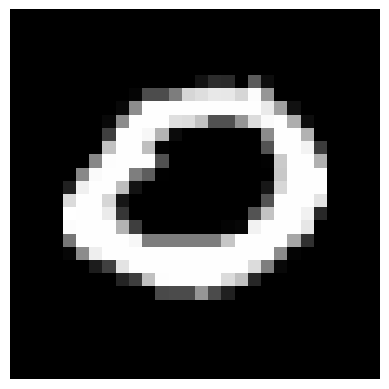

prediction = 9


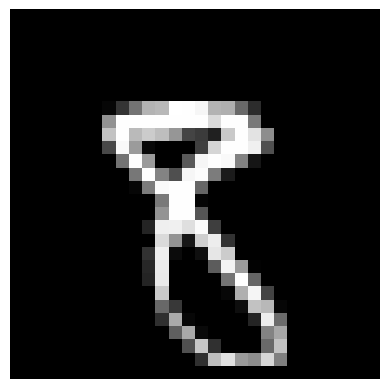

prediction = 2


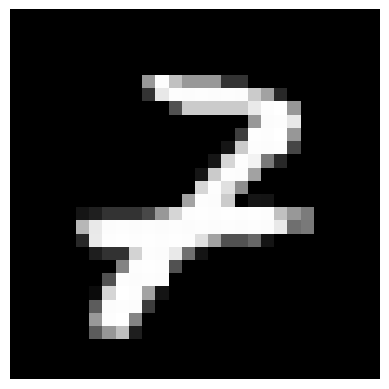

prediction = 3


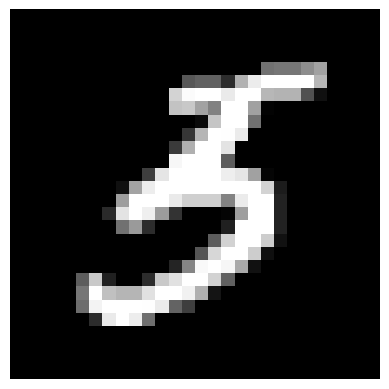

prediction = 6


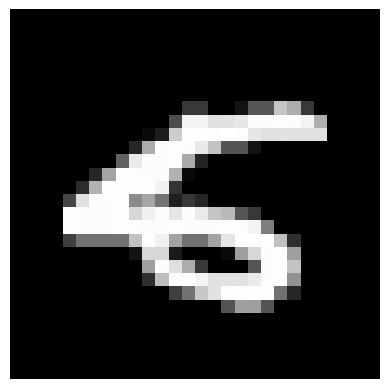

prediction = 1


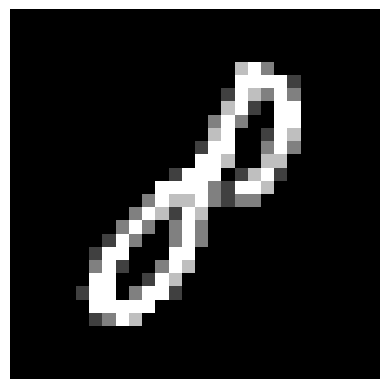

prediction = 2


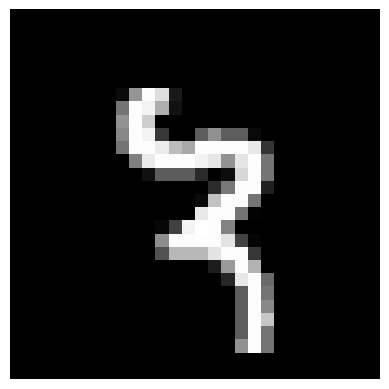

prediction = 4


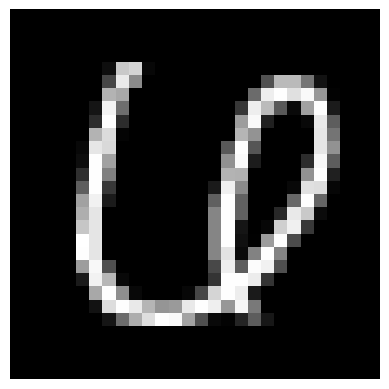

prediction = 9


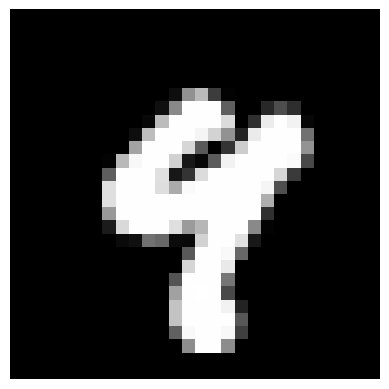

prediction = 1


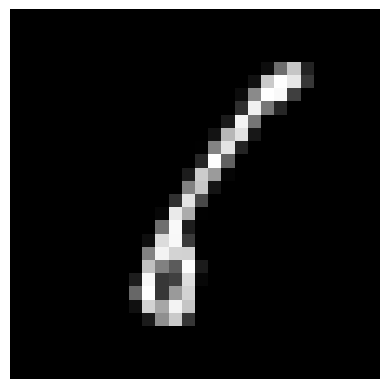

prediction = 0


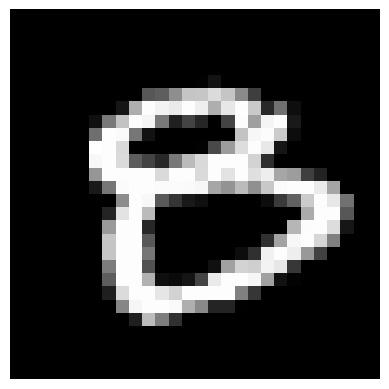

prediction = 0


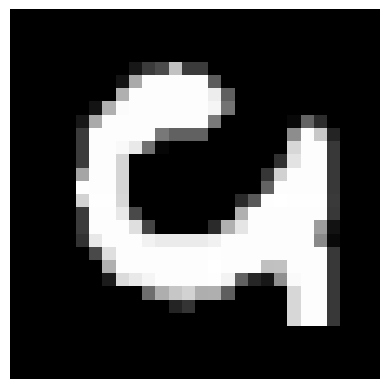

prediction = 0


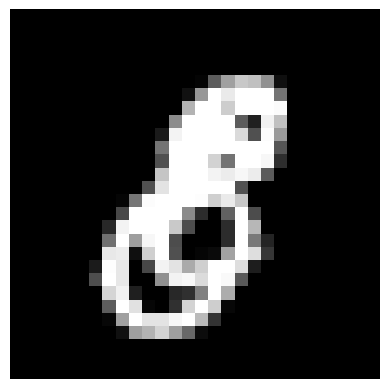

prediction = 8


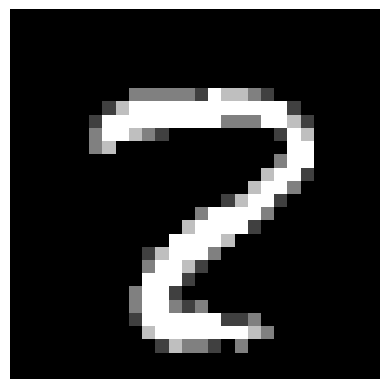

prediction = 5


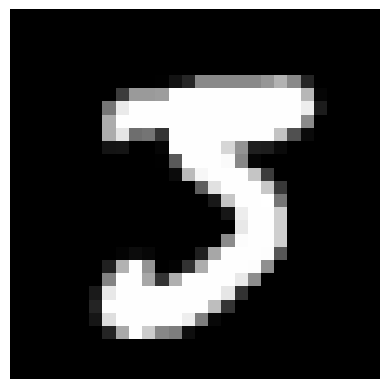

prediction = 8


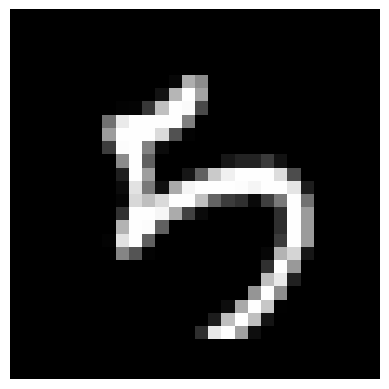

prediction = 1


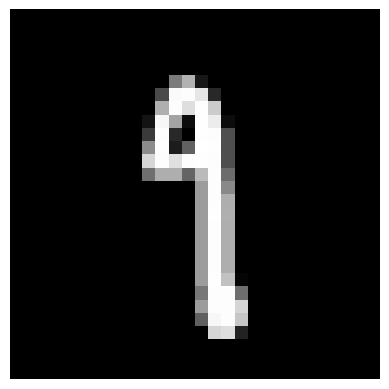

prediction = 4


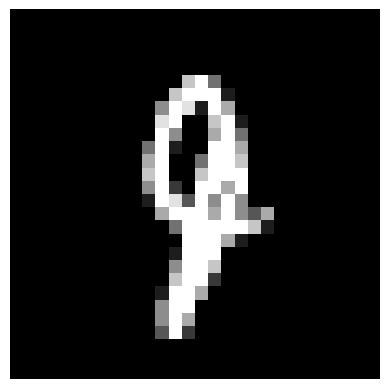

prediction = 4


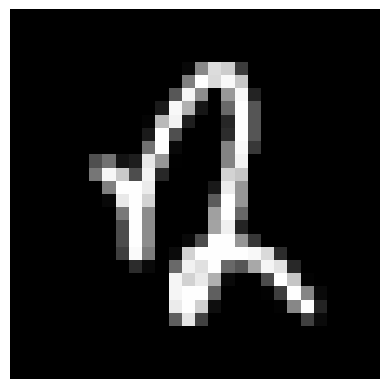

prediction = 3


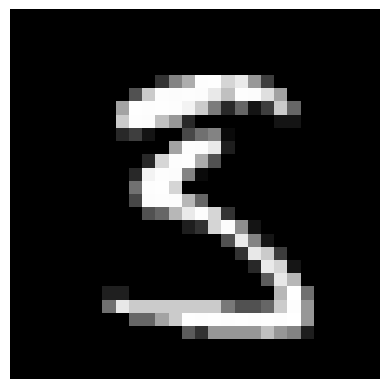

prediction = 1


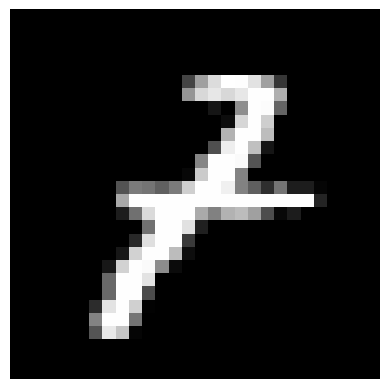

prediction = 5


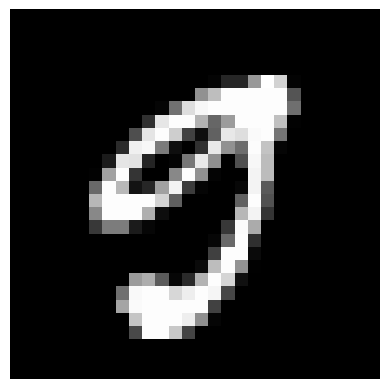

prediction = 1


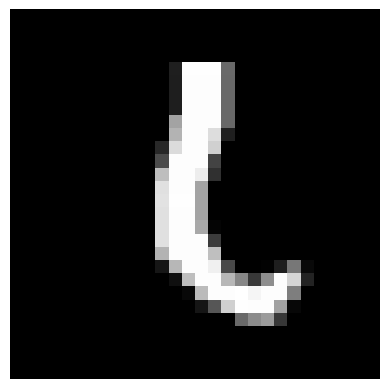

prediction = 7


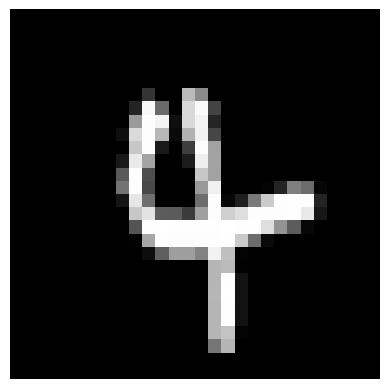

prediction = 0


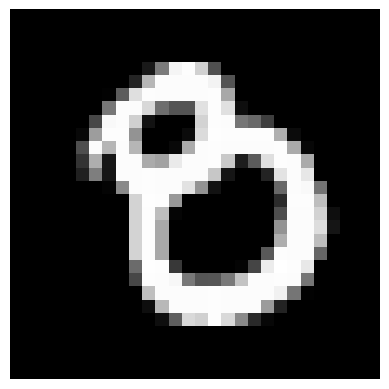

prediction = 2


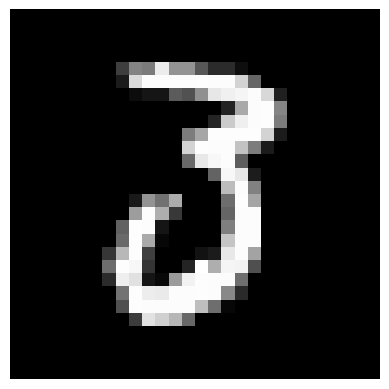

prediction = 7


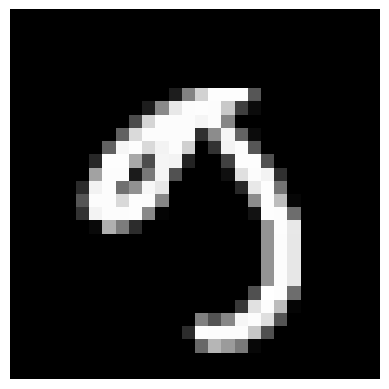

prediction = 5


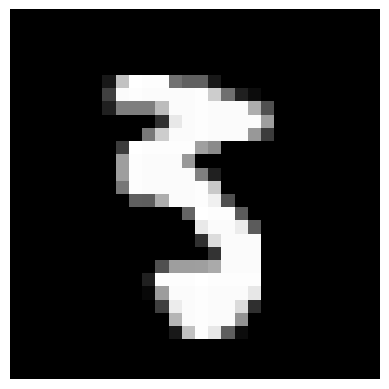

prediction = 5


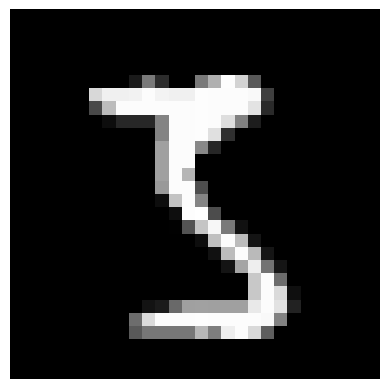

prediction = 9


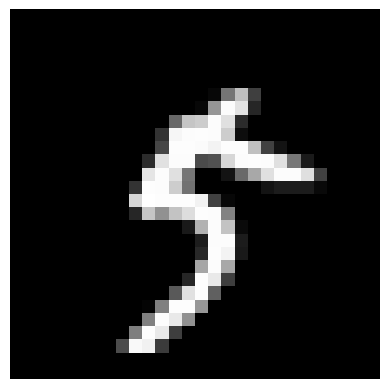

prediction = 9


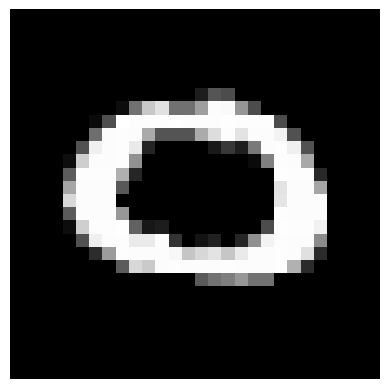

prediction = 9


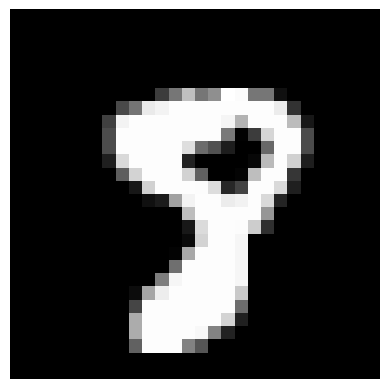

prediction = 9


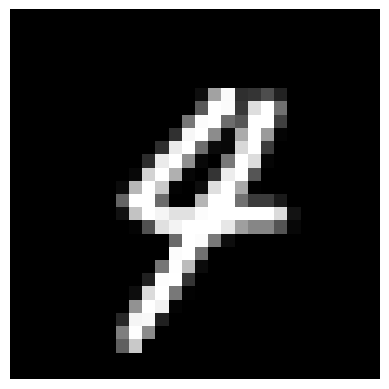

prediction = 0


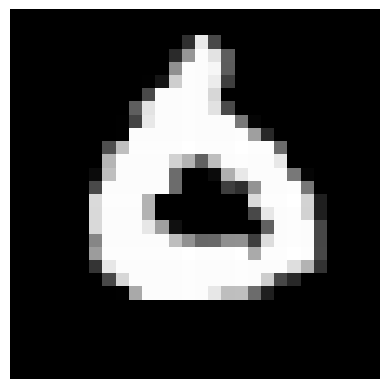

prediction = 1


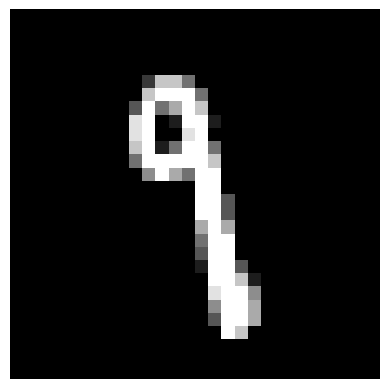

prediction = 4


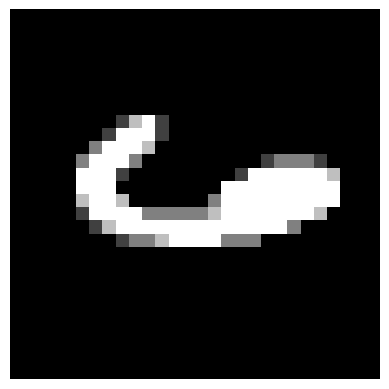

prediction = 0


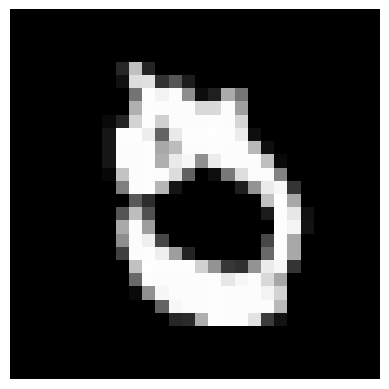

prediction = 5


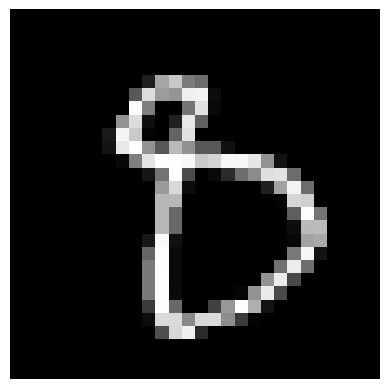

prediction = 3


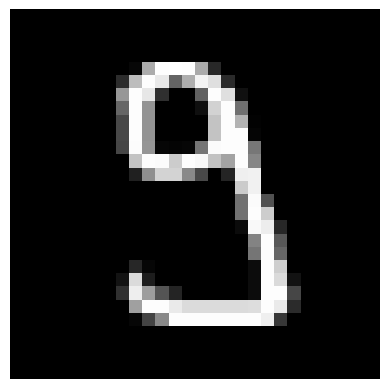

prediction = 4


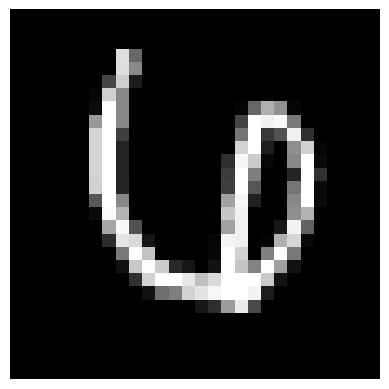

prediction = 9


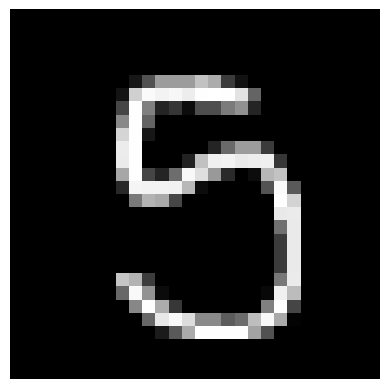

prediction = 8


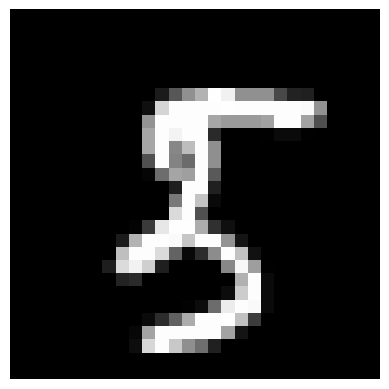

prediction = 6


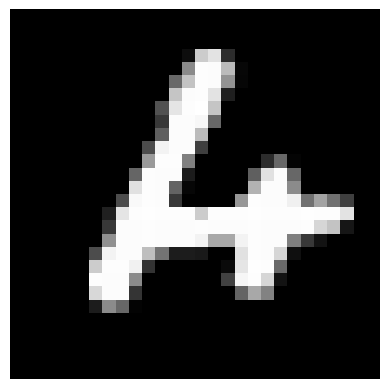

prediction = 3


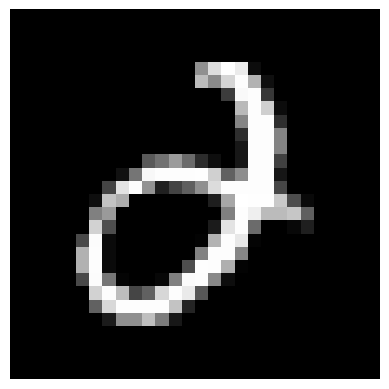

prediction = 6


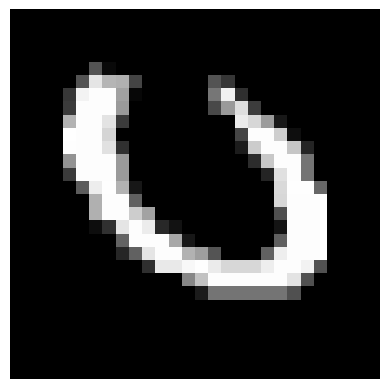

prediction = 0


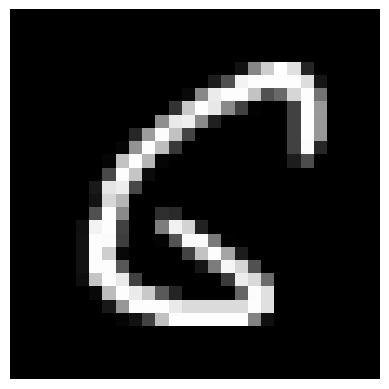

prediction = 3


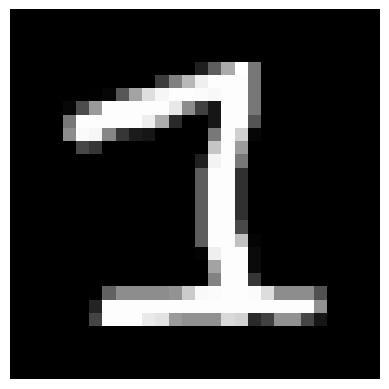

prediction = 6


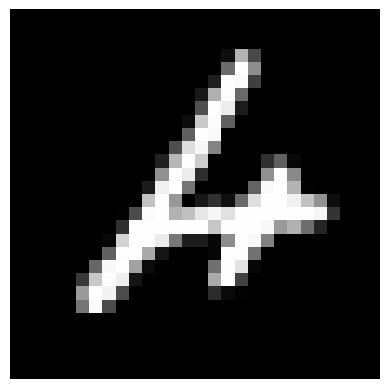

prediction = 9


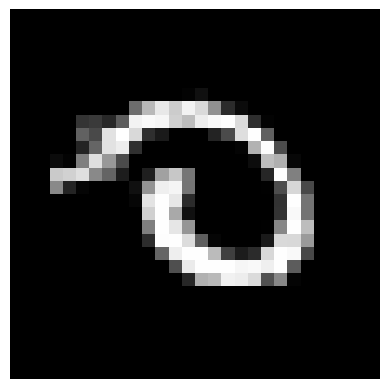

prediction = 3


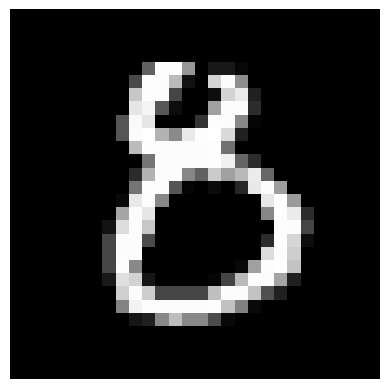

prediction = 0


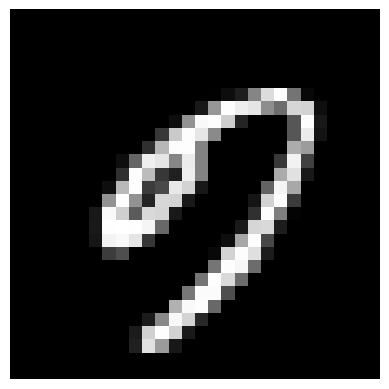

prediction = 7


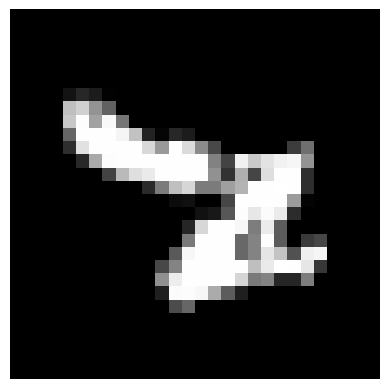

prediction = 4


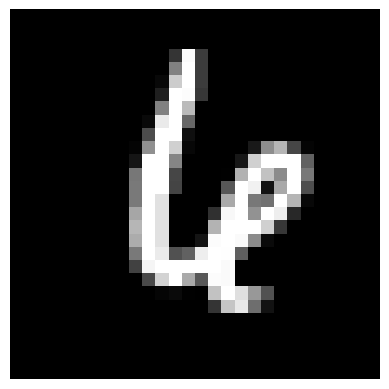

prediction = 9


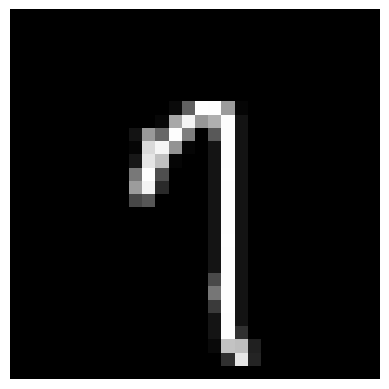

prediction = 7


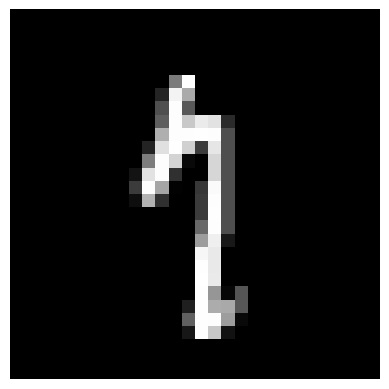

prediction = 3


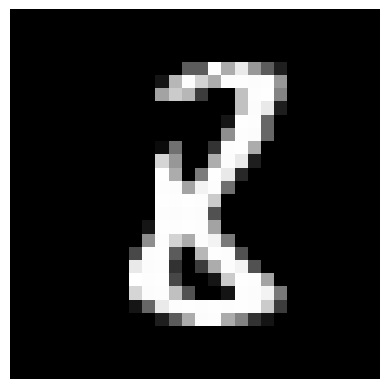

prediction = 1


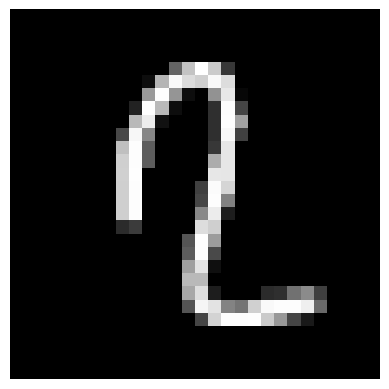

prediction = 3


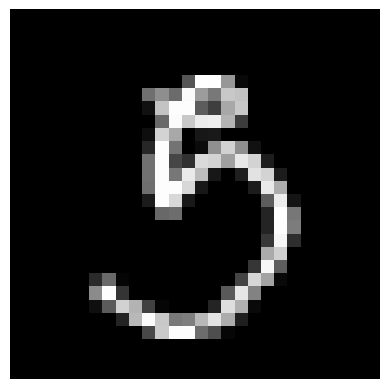

prediction = 7


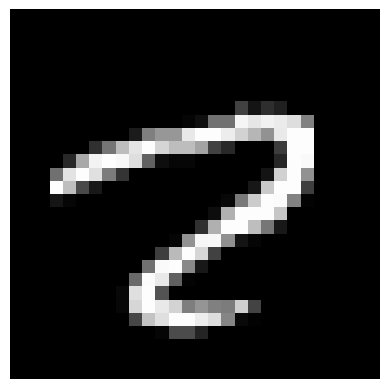

prediction = 3


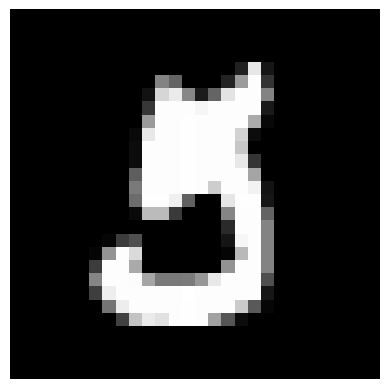

prediction = 4


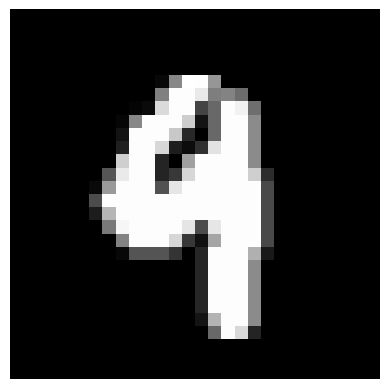

prediction = 2


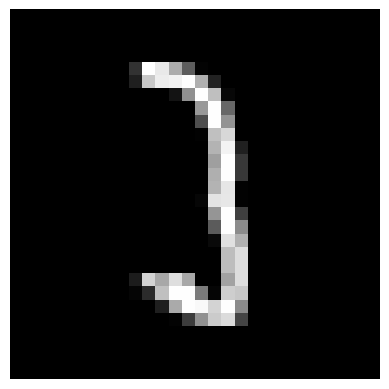

prediction = 7


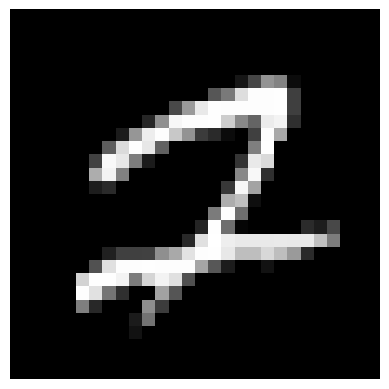

prediction = 9


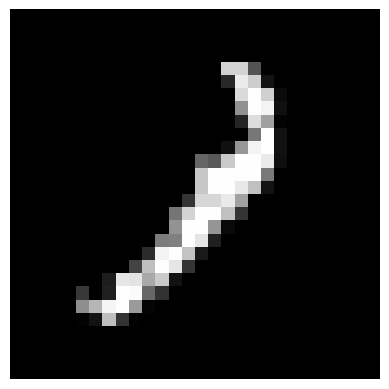

prediction = 5


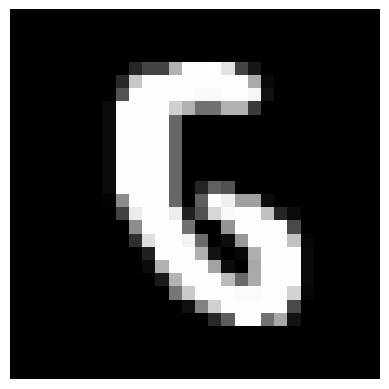

prediction = 2


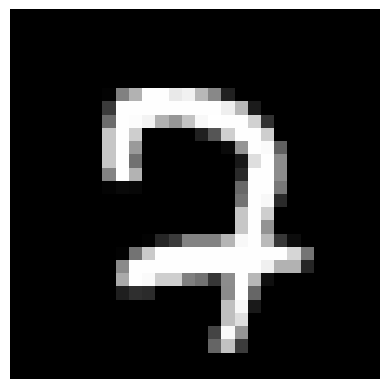

prediction = 5


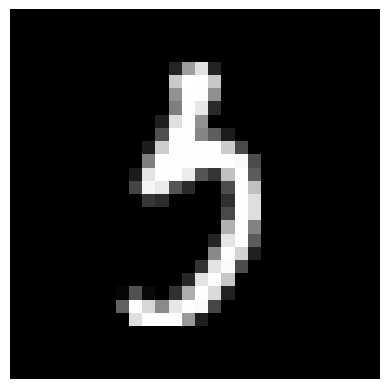

prediction = 3


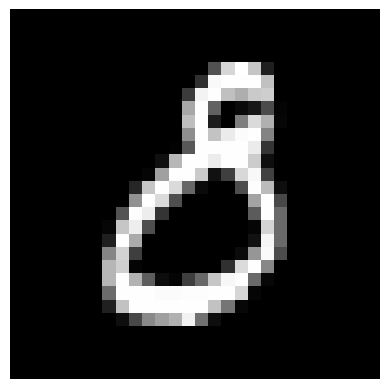

prediction = 4


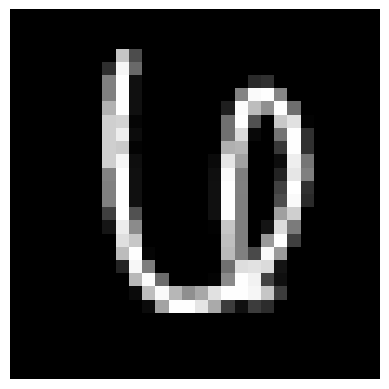

prediction = 4


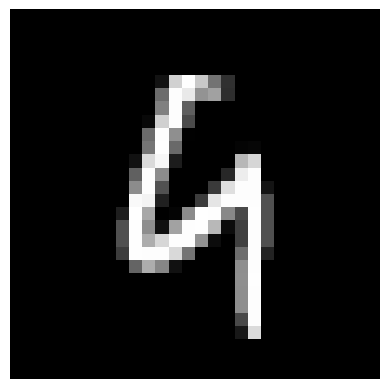

prediction = 2


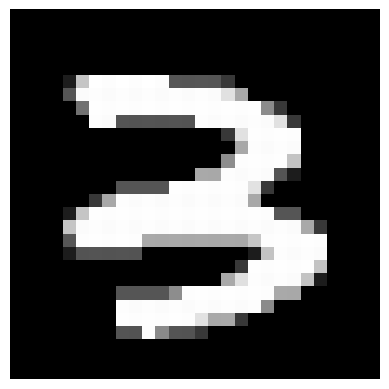

prediction = 9


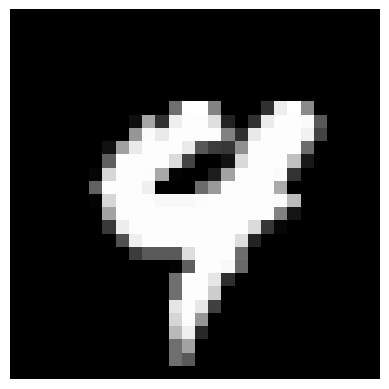

prediction = 8


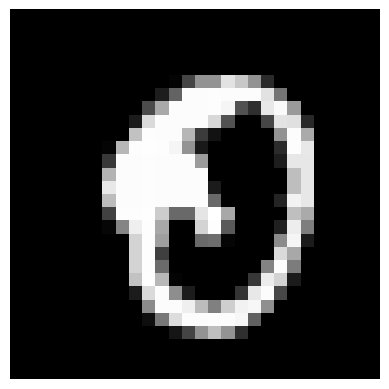

prediction = 8


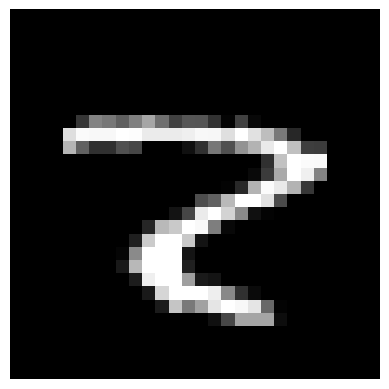

prediction = 4


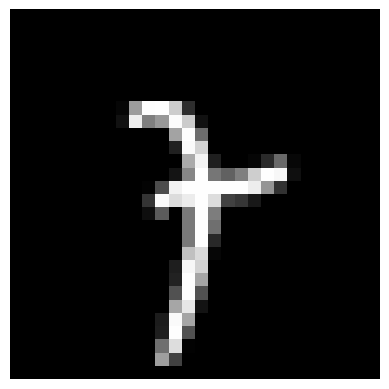

prediction = 5


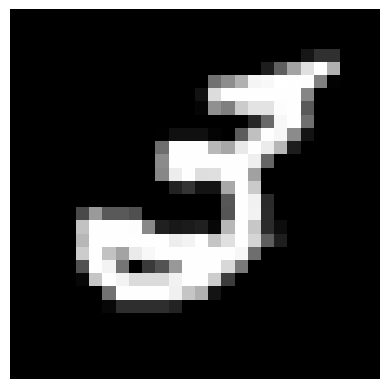

prediction = 4


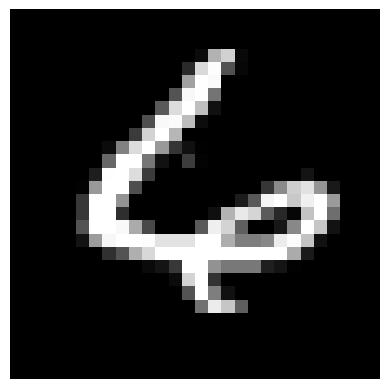

prediction = 8


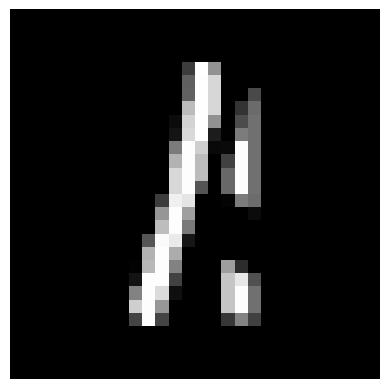

prediction = 3


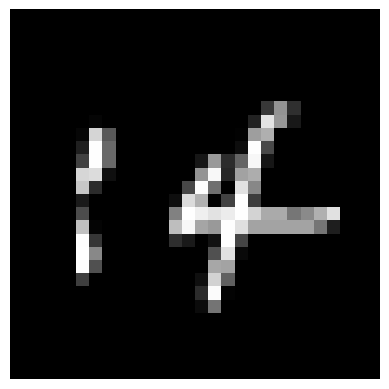

prediction = 8


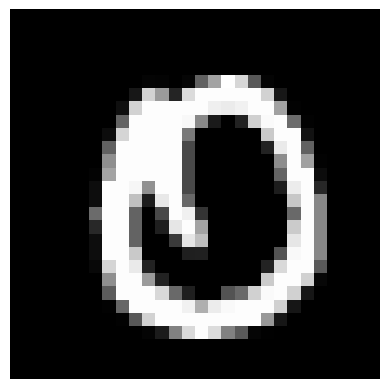

prediction = 2


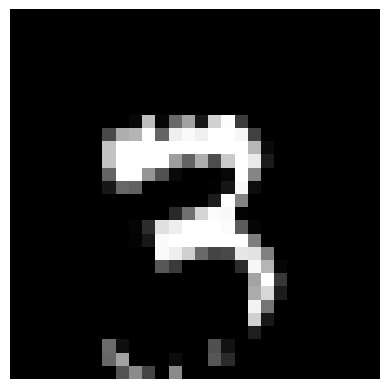

prediction = 7


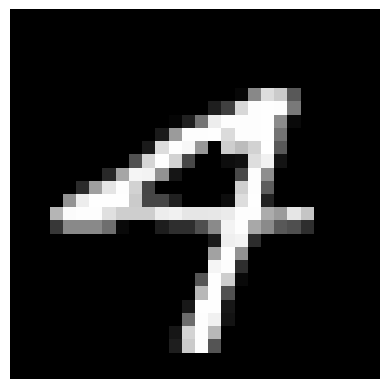

prediction = 0


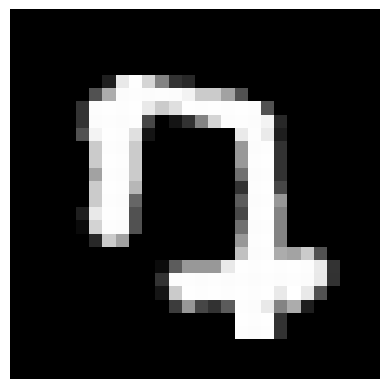

prediction = 9


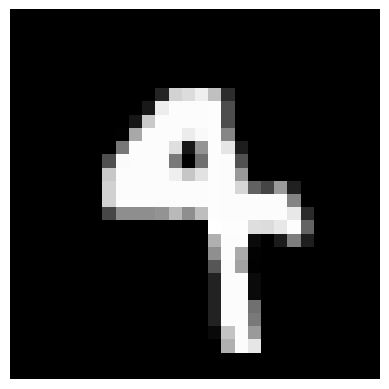

prediction = 3


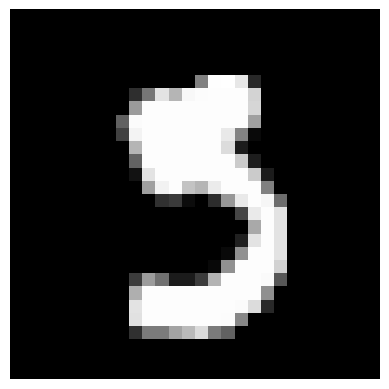

prediction = 8


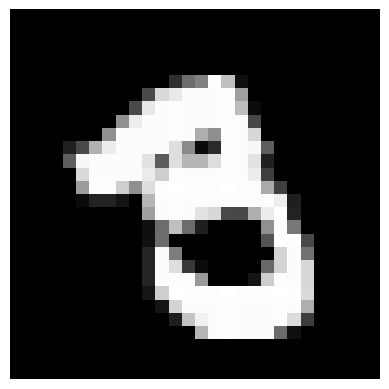

prediction = 8


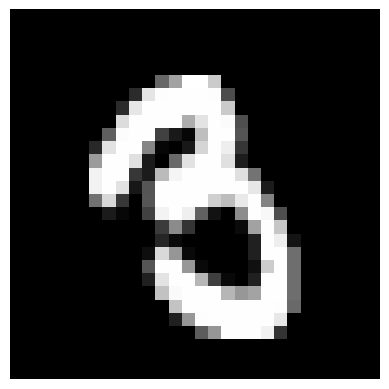

prediction = 8


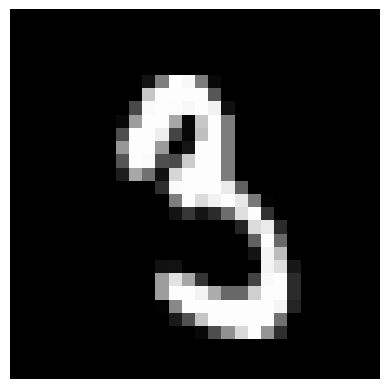

prediction = 8


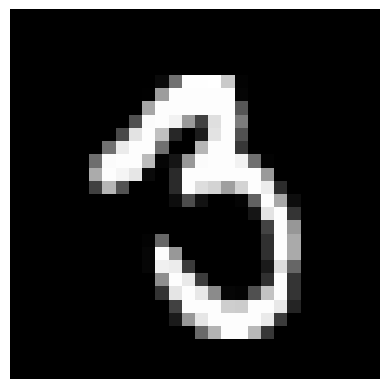

prediction = 8


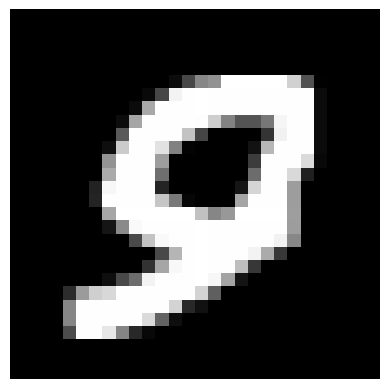

prediction = 4


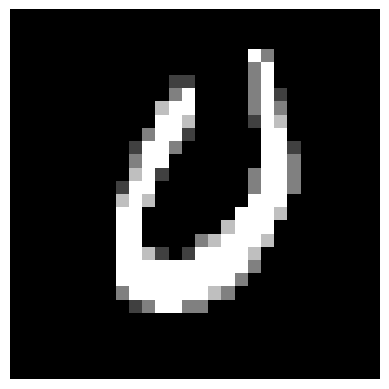

prediction = 2


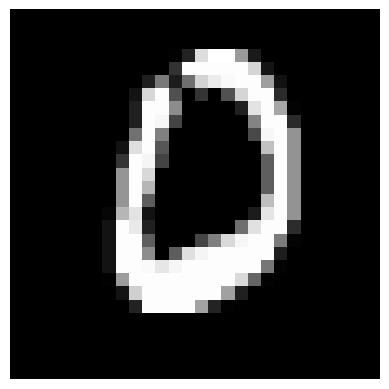

prediction = 9


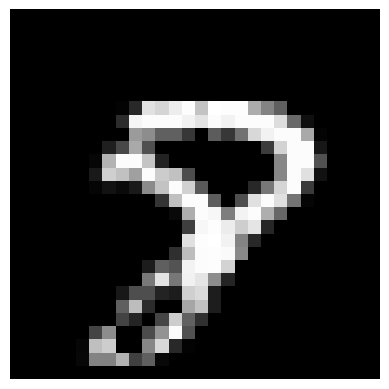

prediction = 2


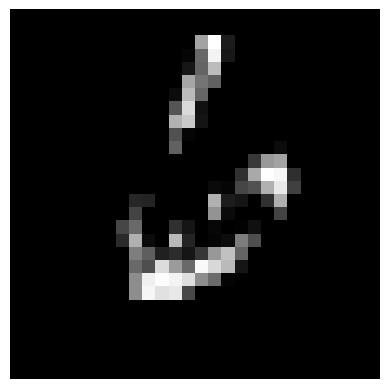

prediction = 7


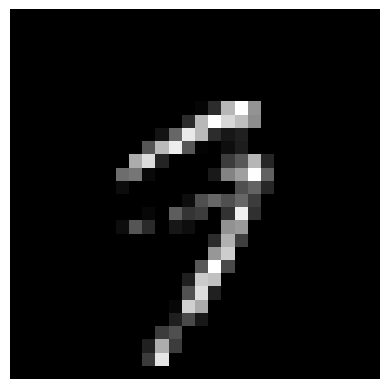

prediction = 1


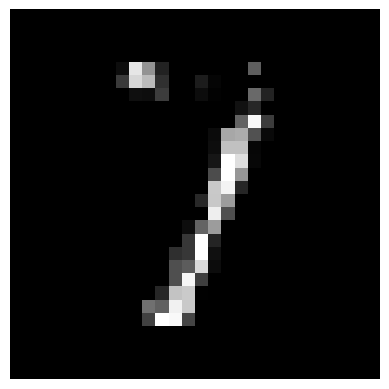

prediction = 7


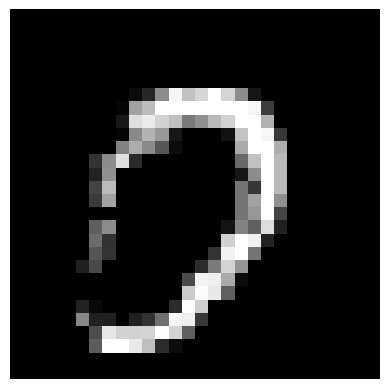

prediction = 4


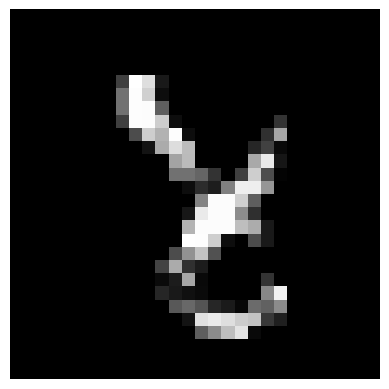

prediction = 8


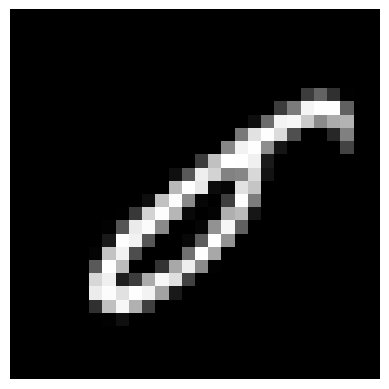

prediction = 6


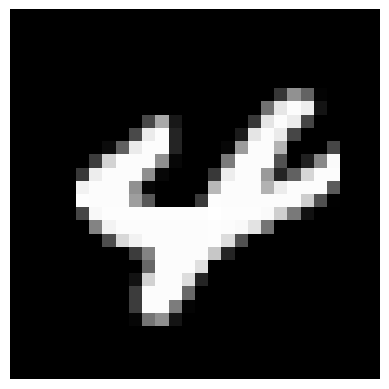

prediction = 9


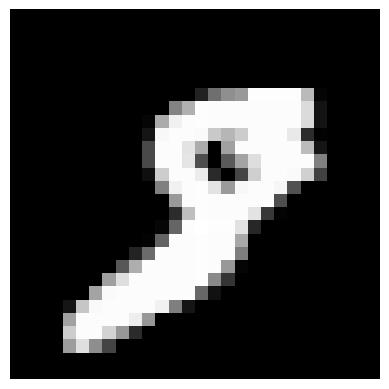

prediction = 6


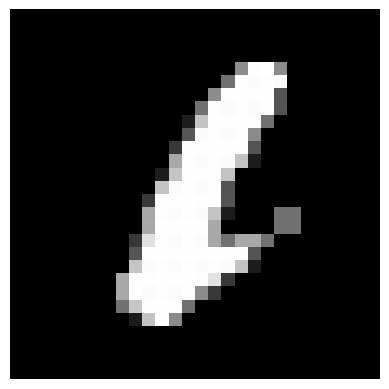

prediction = 4


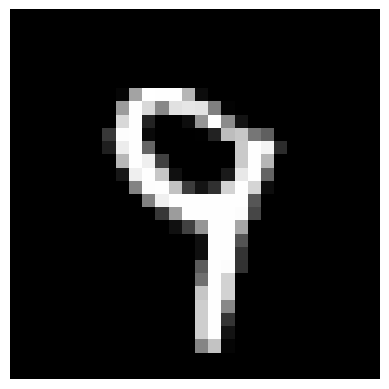

prediction = 3


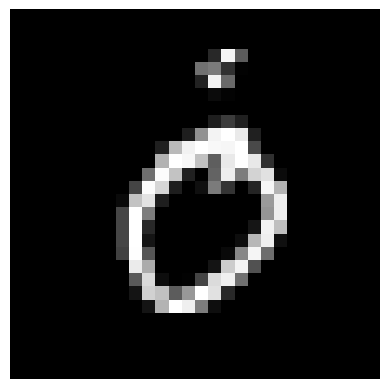

prediction = 9


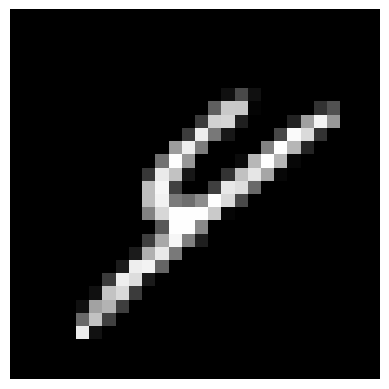

prediction = 7


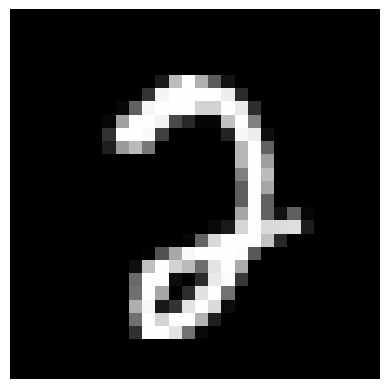

prediction = 8


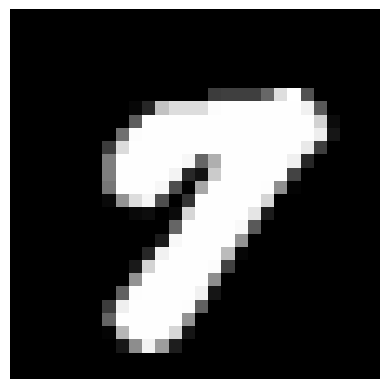

prediction = 1


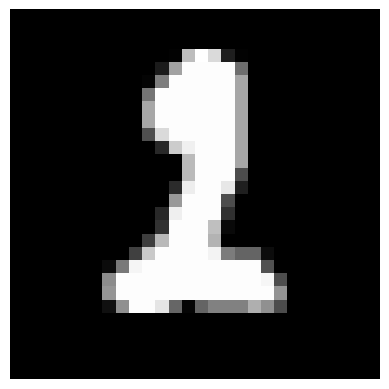

prediction = 6


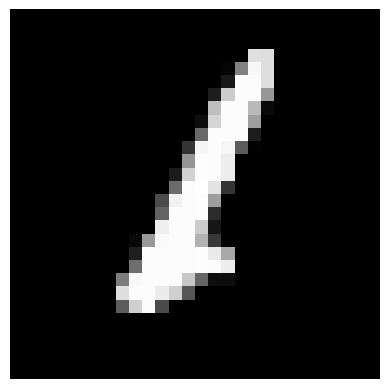

prediction = 7


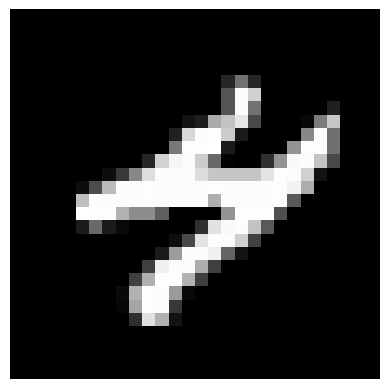

prediction = 9


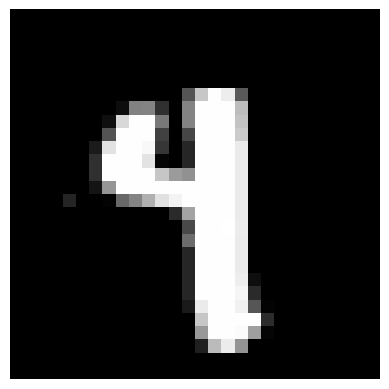

prediction = 9


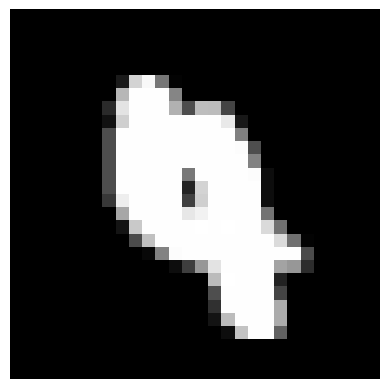

prediction = 2


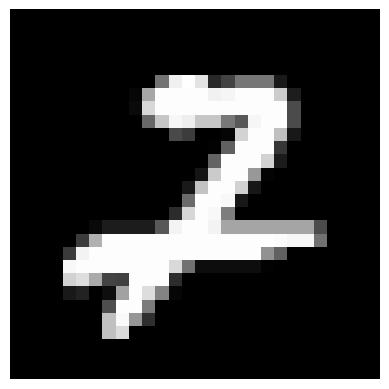

prediction = 2


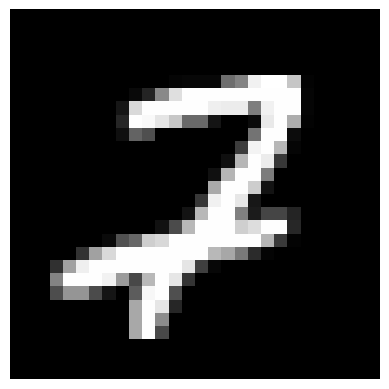

prediction = 8


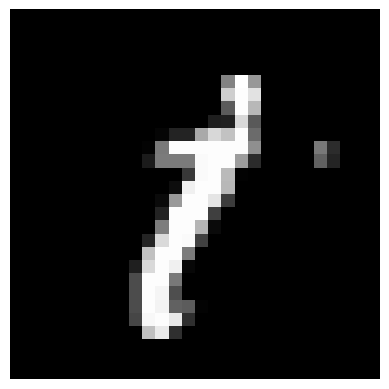

prediction = 4


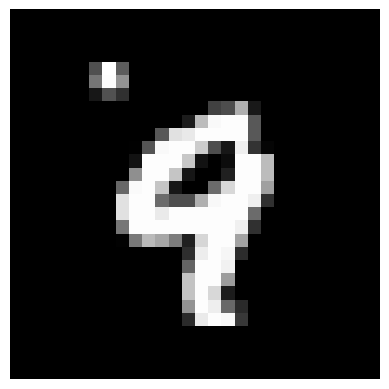

prediction = 3


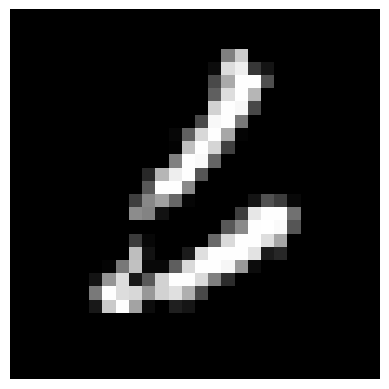

prediction = 6


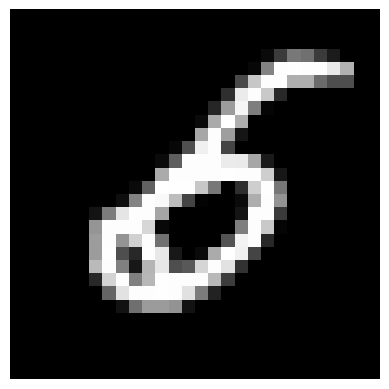

prediction = 0


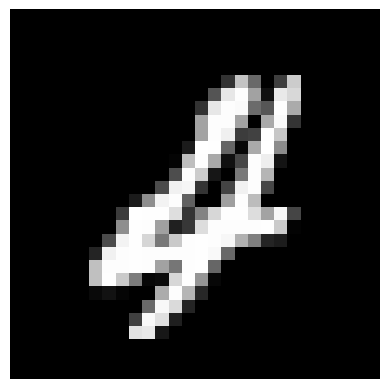

prediction = 5


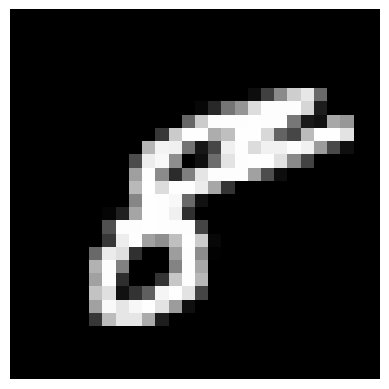

prediction = 0


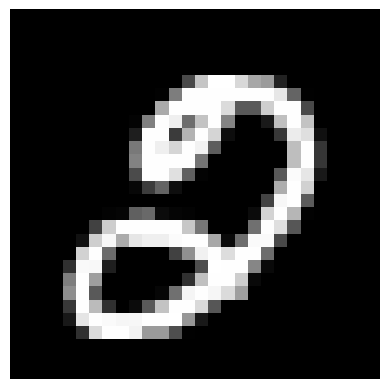

prediction = 0


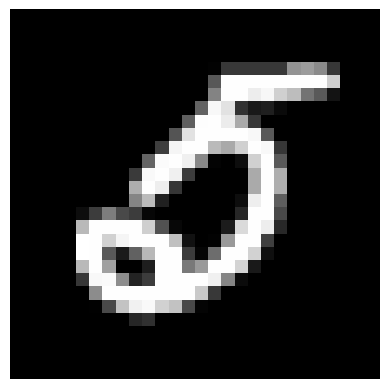

prediction = 7


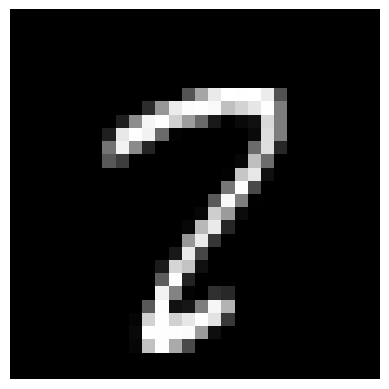

prediction = 7


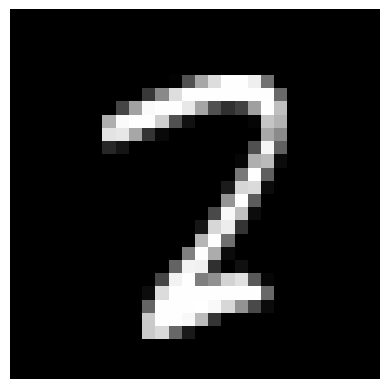

prediction = 6


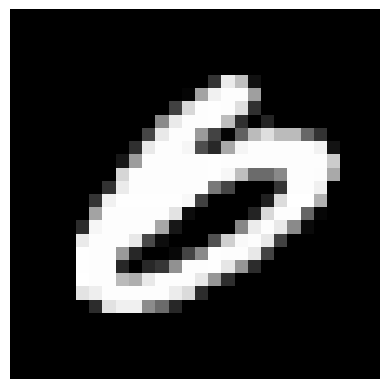

In [16]:
predict_wrong(model, Xte, Yte, wrong)

In [18]:
data_nll(Xte, Yte, model)

0.0716356709599495

Final Test Loss: 0.07163